# <center> Раздел 2. Модуль 5. Визуализация данных

## <center> 9.Закрепление знаний

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly
import plotly.express as px

%matplotlib inline
plt.style.use('default')

def label_loyalty (row):
    if row['Exited'] == 0:
        return 'Loyal'
    else:
        return 'Exited'
def label_Active (row):
    if row['IsActiveMember'] == 0:
        return 'Not Active'
    else:
        return 'Active'
    
def get_credit_score_cat(row):
    if row['CreditScore'] >= 300 and row['CreditScore'] < 500:
        return "Very_Poor"
    elif row['CreditScore'] >= 500 and row['CreditScore'] < 601:
        return "Poor"
    elif row['CreditScore'] >= 601 and row['CreditScore'] < 661:
        return "Fair"
    elif row['CreditScore'] >= 661 and row['CreditScore'] < 781:
        return "Good"
    elif row['CreditScore'] >= 781 and row['CreditScore'] < 851:
        return "Excellent"
    elif row['CreditScore'] >= 851:
        return "Top"
    elif row['CreditScore'] < 300:
        return "Deep"
    



churn_data = pd.read_csv('data/churn.csv')
churn_data.drop('RowNumber', axis=1, inplace=True)
#добавляем столбец для испаользования как метку в легенде
churn_data['Loyal_label'] = churn_data.apply (lambda row: label_loyalty(row), axis=1)

#добавляем столбец для испаользования как метку в графике
churn_data['Active_label'] = churn_data.apply (lambda row: label_Active(row), axis=1)

 

churn_data.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyal_label,Active_label
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Exited,Active
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal,Active
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Exited,Not Active
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal,Not Active
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal,Active


### <center> 9.1. Каково соотношение ушедших и лояльных клиентов?

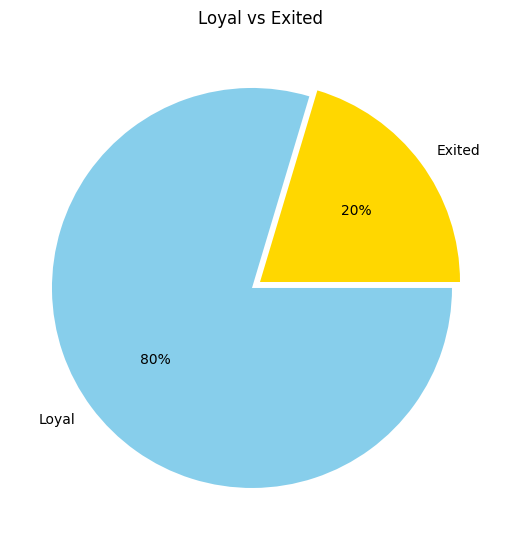

In [444]:
exited = churn_data.groupby('Loyal_label').size()

fig = plt.figure(figsize=(5, 5))

explode = (0, 0.05)
axes = fig.add_axes([0, 0, 1, 1])


axes.pie(
    x = exited,
    explode=explode,
    labels=exited.index,
    autopct='%.0f%%',
    colors=['gold','skyblue']
    
)

#loyal_patch = mpatches.Patch(color='skyblue', label='Loyal')
#exited_patch = mpatches.Patch(color='gold', label='Exited')
#plt.legend(handles=[loyal_patch, exited_patch])
axes.set_title('Loyal vs Exited')

plt.show()



Каждый пятый клиент пикидает банк.

### <center> 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.

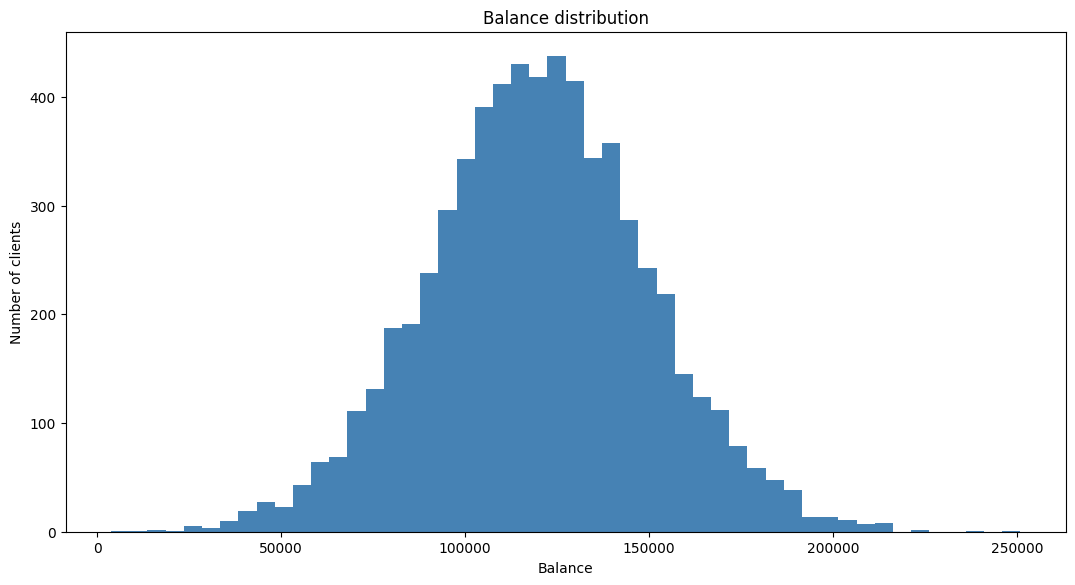

In [445]:
balance_distrib = churn_data.loc[(churn_data['Balance'] > 2500)]

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(x=balance_distrib['Balance'], color='steelblue', bins = 50)

axes.set_title('Balance distribution')
plt.ylabel('Number of clients')
plt.xlabel('Balance')

plt.show()

Баланс основной массы клиентов нахродится между 50 000$ и 200 000$

### <center> 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?

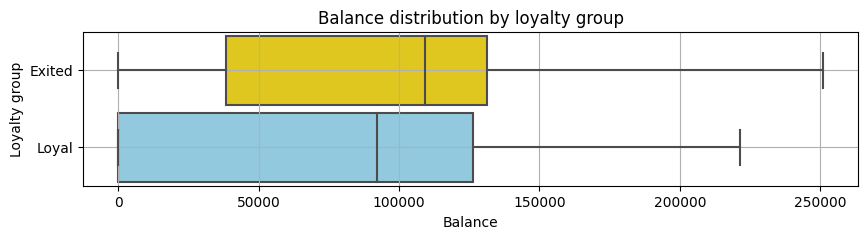

In [446]:

fig = plt.figure(figsize=(10, 2))
my_colors = ['#FFDF00', '#87CEEB']
my_palette =  sns.set_palette(my_colors)

boxplot = sns.boxplot(
    data=churn_data,
    y='Loyal_label',
    x='Balance',
    orient='h',
    color=my_palette,
    width=0.9,
)
boxplot.set_title('Balance distribution by loyalty group');
boxplot.set_xlabel('Balance');
boxplot.set_ylabel('Loyalty group');
boxplot.grid()



Балан ушедших клиентовв обшем и среднем выше чем у оставшихся с банком клиетов

### <center> 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

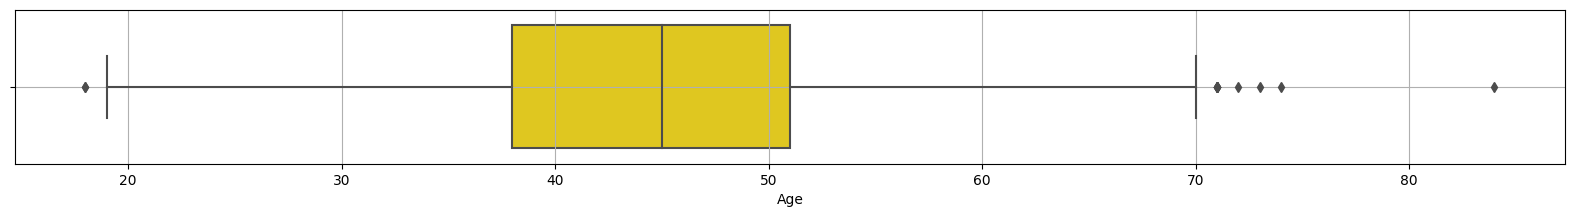

In [447]:
balance_Exited = churn_data.loc[(churn_data['Exited']  == 1)]

fig = plt.figure(figsize=(20, 2))
ax = sns.boxplot(x="Age", data=balance_Exited, color='#FFDF00')
ax.grid()



Больше всего выбрасов в категории между 70 и 80, особое внимание нужно обратить на группу между 40 и 50

### <center> 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

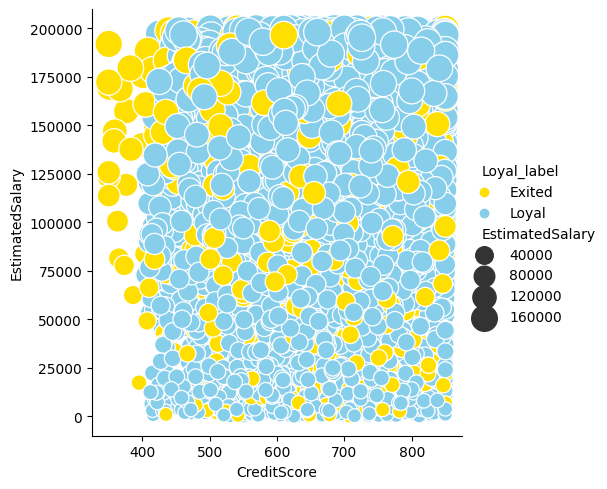

In [448]:
my_colors = ['#FFDF00', '#87CEEB']
my_palette =  sns.set_palette(my_colors)

g = sns.relplot(
    data=churn_data,
    x="CreditScore", y="EstimatedSalary",
    hue="Loyal_label", size="EstimatedSalary",
    palette=my_palette, sizes=(100, 400),
)



CreditScore у лояльных клиентов выше 400. Клиенты с более низким CreditScore покидают банк чаше. 

## <center> 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

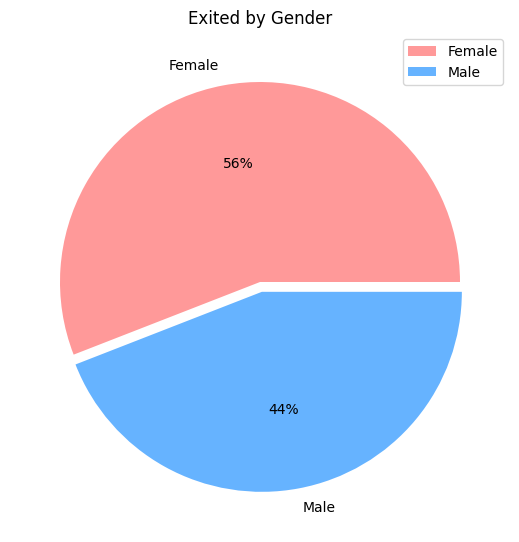

In [449]:
gender_exited = churn_data.loc[(churn_data['Exited']  == 1)].groupby("Gender").size()

fig = plt.figure(figsize=(5, 5))

explode = (0, 0.05)
axes = fig.add_axes([0, 0, 1, 1])


axes.pie(
    x = gender_exited,
    explode=explode,
    labels=gender_exited.index,
    autopct='%.0f%%',
    colors= ['#ff9999','#66b3ff']
   
)

axes.set_title('Exited by Gender')
plt.legend()
plt.show()


### <center> 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Text(0, 0.5, ' # Clients')

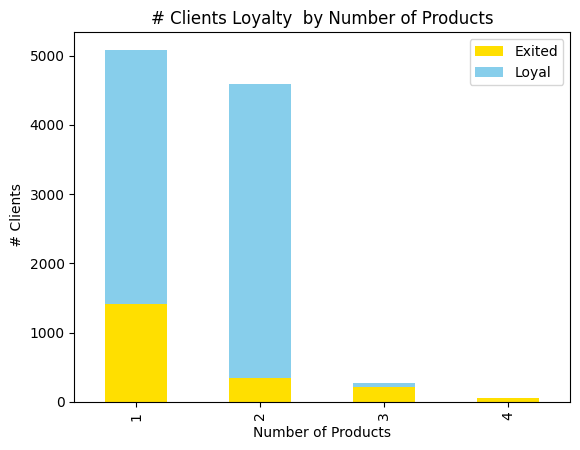

In [450]:

NumOfProducts_exited = churn_data.loc[(churn_data['Exited']  == 1)].groupby("NumOfProducts").size()
NumOfProducts_loyal = churn_data.loc[(churn_data['Exited']  == 0)].groupby("NumOfProducts").size()

    
concat_ds = pd.concat([NumOfProducts_exited, NumOfProducts_loyal], axis=1, join='outer') 
result = concat_ds.set_axis(["Exited", "Loyal"], axis=1, inplace=False)


result.plot.bar(stacked=True)
plt.title("# Clients Loyalty  by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel(" # Clients")


Клиенты с большим количеством услуг чаще покидают банк

### <center> 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0, 0.5, ' # Clients')

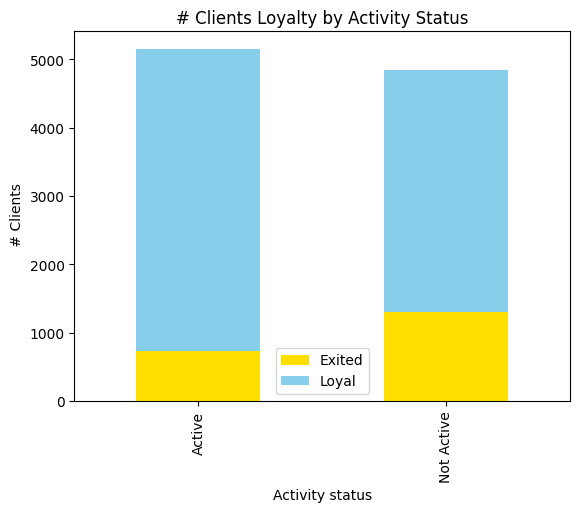

In [451]:
NumOfProducts_exited = churn_data.loc[(churn_data['Exited']  == 1)].groupby("Active_label").size()
NumOfProducts_loyal = churn_data.loc[(churn_data['Exited']  == 0)].groupby("Active_label").size()

    
concat_ds = pd.concat([NumOfProducts_exited, NumOfProducts_loyal], axis=1, join='outer') 

result = concat_ds.set_axis(["Exited", "Loyal"], axis=1, inplace=False)

result.plot.bar(stacked=True)

plt.title("# Clients Loyalty by Activity Status")
plt.xlabel("Activity status")
plt.ylabel(" # Clients")

Чтобы уменьшить отток среди неактивных клиетов нужно их вовлеч

### <center> 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [458]:



churn_data['Exited_Cat'] = churn_data['Exited'].astype('category')
geography_exited = churn_data[churn_data['Exited_Cat'] == 1].groupby(['Geography']).size().reset_index(name='count') 

geography_exited.head()


#df = churn_data.query("Exited == 1")
fig = px.scatter_geo(
        geography_exited, 
        locations="Geography",
        locationmode = "country names", #режим сопоставления локаций с базой plotly
        size="count", # size of markers, "pop" is one of the columns of gapminder
        color="count", #от чего зависит цвет
        range_color=[0, 1000],
        title='Exited Geography', #заголовок
        width=800, #ширина
        height=500, #высота
        color_continuous_scale='Reds' #палитра цветов                     
                     )
fig.show()


### <center> 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [476]:
#добавляем столбец для испаользования для преобразования в категорию
churn_data['credit_score_cat'] = churn_data.apply(lambda row: get_credit_score_cat(row), axis=1)
# преобразуем тип столбца    
churn_data['credit_score_cat'] = churn_data['credit_score_cat'] .astype('category')


Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

In [477]:
table = churn_data.pivot_table(index='credit_score_cat',columns='Tenure', values='Exited', aggfunc='mean')


На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(50.722222222222214, 0.5, 'Credit Score Category')

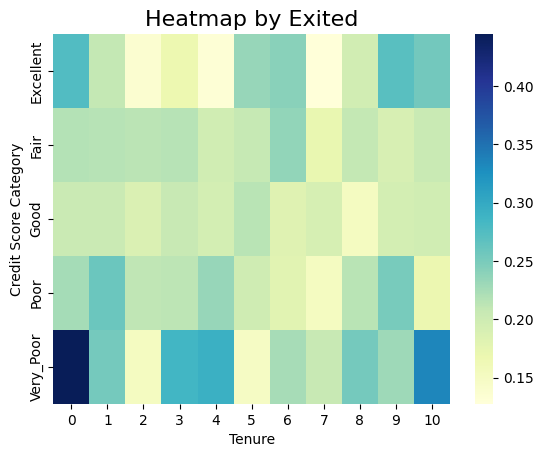

In [478]:
#строим график
heatmap = sns.heatmap(data=table, cmap='YlGnBu')
heatmap.set_title('Heatmap by Exited', fontsize=16)
heatmap.set_ylabel('Credit Score Category')


In [ ]:
Чаще всего уходят клиенты с категорией "Very_Poor" 